In [165]:
import math
import shapely as shp
from shapely import plotting
from shapely.geometry import Polygon, Point, MultiPolygon, LineString

import geopandas as gpd
import laspy
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import pickle

# Loading data

In [166]:
# Mount data
os.system('sudo blobfuse /home/azureuser/cloudfiles/code/blobfuse/sidewalk --tmp-path=/mnt/resource/blobfusetmp --config-file=/home/azureuser/cloudfiles/code/blobfuse/fuse_connection_sidewalk.cfg -o attr_timeout=3600 -o entry_timeout=3600 -o negative_timeout=3600 -o allow_other -o nonempty')

0

In [170]:
# Load cluster dictionary
path = "/home/azureuser/cloudfiles/code/blobfuse/sidewalk/processed_data/crossings_project/CW cleaning/Osdorp/final clusterdicts Osdorp.pkl"

with open(path, 'rb') as file:
    clusters = pickle.load(file)

# Plotting function

In [171]:
# Function to plot PC polygon
def plot_PC_2D(PC_pol_dict, coords, intensity):
    x = PC_pol_dict[coords][:, 0]
    y = PC_pol_dict[coords][:, 1]
    plt.figure()
    plt.scatter(x, y, c=PC_pol_dict[intensity], cmap='viridis')
    plt.colorbar(label='Reflective index')  # Add colorbar to show gradient values
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D with intensity gradient')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Filtering polygons

In [172]:
# Create shapely polygons out of the PC polygons
for cluster_group in clusters:
    for cluster in cluster_group:
        pols = []
        for coor in cluster['clean_coords']:
            temp_point = Point(coor[0], coor[1])
            buff_point = temp_point.buffer(0.08)
            pols.append(buff_point)
        multi_pol = MultiPolygon(pols)
        cluster['Multi Polygon'] = multi_pol
        cluster['Polygon'] = multi_pol.convex_hull

In [173]:
# Function to plot the polygons
def plot_polygon(polygon):
    # Extract polygon coordinates
    x_coords, y_coords = polygon.exterior.xy
    
    # Calculate aspect ratio based on the range of x and y coordinates
    x_range = max(x_coords) - min(x_coords)
    y_range = max(y_coords) - min(y_coords)
    aspect_ratio = y_range / x_range
    
    # Create the plot with the calculated aspect ratio
    fig, ax = plt.subplots(figsize=(1, 1 * aspect_ratio))  # Adjust the figsize as needed
    ax.set_aspect('equal')  # Ensure equal aspect ratio
    
    # Plot the polygon
    ax.plot(x_coords, y_coords, color='blue')
    
    # Show the plot
    plt.show()

In [174]:
# Function to check if a polygon is a crosswalk stripe
def is_rectangle(polygon):

    # We first check if the minimum rotated rectangle overlaps for at least 90% with the original polygon
    # This filters out shapes that are not square/rectangular
    min_rect = polygon.minimum_rotated_rectangle
    
    area = polygon.area/min_rect.area
    print(area)

    if area > .90:
        area_bool = True
        
    else:
        area_bool = False

    # We then check the lengths of the vertices of the polygon to see if they resemble a crosswalk stripe
    if area_bool == True:
        coords = min_rect.boundary.coords
        
        linestrings = [LineString(coords[k:k+2]) for k in range(len(coords) - 1)]

        lengths = []

        for line in linestrings:
            lengths.append(line.length)
        
        # Define the conditions
        condition1 = sum(3 <= length <= 7 for length in lengths)
        condition2 = sum(0.6 <= length <= 0.8 for length in lengths)
        for length in lengths:
            print(length)

        # Check if the conditions are met
        if not (condition1 == 2 and condition2 == 2):
            area_bool = False

    
    return area, area_bool


0.6691505007998549
Cluster is not a rectangle


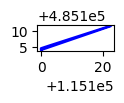

0.6496330378957731
Cluster is not a rectangle


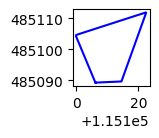

0.930490888814182
0.7498131868885475
6.187957874644406
0.7498131868820492
6.187954253457613
Cluster is a rectangle


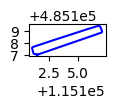

0.7115206236055758
Cluster is not a rectangle


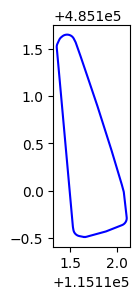

0.9305884072444481
0.6593776847797579
0.6636278697788152
0.6593812840769372
0.6636206710958258
Cluster is not a rectangle


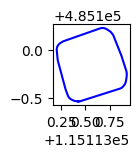

0.9539211236326745
0.6684386991787956
6.050693576361732
0.6684351561702514
6.05069711945293
Cluster is a rectangle


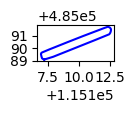

0.9802365790939023
0.6629504557632289
6.075401846614006
0.6629504557685445
6.07540184660046
Cluster is a rectangle


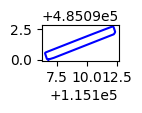

0.9355942774014134
0.6382461563780414
0.6638117309738513
0.6382498223882542
0.6638117309526023
Cluster is not a rectangle


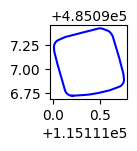

0.9713723658676194
0.6634895801741095
5.028207857467243
0.663489580218563
5.0282042218884495
Cluster is a rectangle


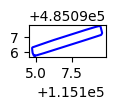

0.7537093530095127
Cluster is not a rectangle


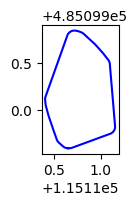

0.9857507781765277
0.6730956834783479
6.0862571789291575
0.6730993172985181
6.086257178910241
Cluster is a rectangle


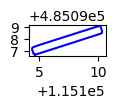

0.9833270944480376
0.6775079153328071
6.074221969860528
0.6775042787743407
6.074221969862758
Cluster is a rectangle


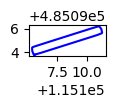

0.8012281842051432
Cluster is not a rectangle


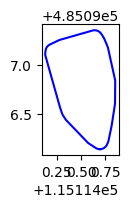

0.977809929774829
0.6504225742227242
6.035824566900804
0.6504298421194957
6.035828200862969
Cluster is a rectangle


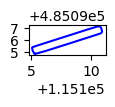

0.977809929774829
0.6504225742227242
6.035824566900804
0.6504298421194957
6.035828200862969
Cluster is a rectangle


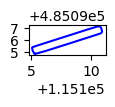

0.9081062969884379
0.6373365024963713
0.6655226388193348
0.6373401122656623
0.6655190289220886
Cluster is not a rectangle


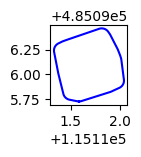

0.9713723658676194
0.6634895801741095
5.028207857467243
0.663489580218563
5.0282042218884495
Cluster is a rectangle


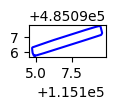

0.922343460510061
0.6579865088006819
0.6640934969136728
0.657986508693353
0.6641007549703992
Cluster is not a rectangle


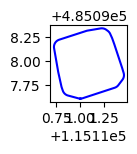

0.8867320253834333
Cluster is not a rectangle


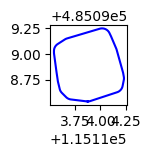

0.8917475890555457
Cluster is not a rectangle


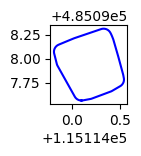

0.981871217303953
0.6876570725772063
6.111299233323148
0.6876607664341666
6.111295539397897
Cluster is a rectangle


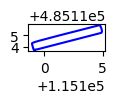

0.9739727178524047
0.6796927612359338
6.1420047630242065
0.6796890671169498
6.142001068885489
Cluster is a rectangle


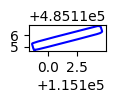

0.7882500958387909
Cluster is not a rectangle


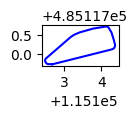

0.9883011590960339
0.6650750707012159
6.141313030830856
0.6650750706878382
6.141309398575564
Cluster is a rectangle


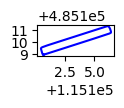

0.9848619281024255
0.6648252286066004
6.169561009865195
0.6648288577840472
6.169557380640829
Cluster is a rectangle


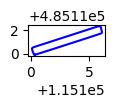

0.930490888814182
0.7498131868885475
6.187957874644406
0.7498131868820492
6.187954253457613
Cluster is a rectangle


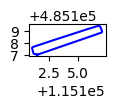

0.9445775447417211
0.6473245443959529
0.6605118844923448
0.6473245443631649
0.6605155265641047
Cluster is not a rectangle


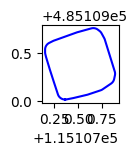

0.7435267927470663
Cluster is not a rectangle


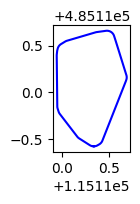

0.9209838652390897
0.6372280020738172
0.6623358559904257
0.6372243359923394
0.6623358560067677
Cluster is not a rectangle


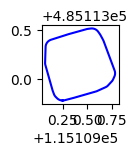

0.6849911788547008
Cluster is not a rectangle


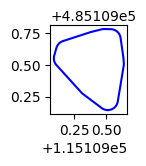

0.6557449717646507
Cluster is not a rectangle


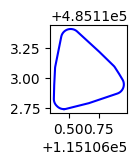

0.979884028699414
0.7041575910943854
6.184070315483673
0.7041612171474296
6.184070315524137
Cluster is a rectangle


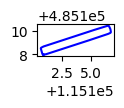

0.9434658774668128
0.6467294760863648
0.6776033310244471
0.6467331282413024
0.6775996788997775
Cluster is not a rectangle


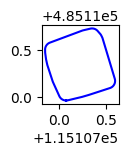

0.9329068921383455
0.603912461990884
0.6536186027446075
0.603912461990884
0.6536186027446075
Cluster is not a rectangle


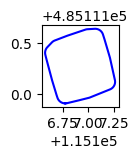

0.6527610059521571
Cluster is not a rectangle


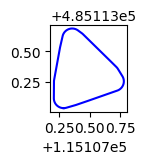

0.9463185874430404
0.621950212584822
0.6491443624327166
0.6219465936498406
0.6491443624511736
Cluster is not a rectangle


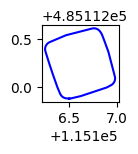

0.9045288197438667
0.6480915690737933
0.6601593726456919
0.648087871525491
0.6601556751341101
Cluster is not a rectangle


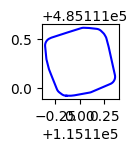

0.9062276365069232
0.6369334804451057
0.6470013322271033
0.6369334804451057
0.6470013322271033
Cluster is not a rectangle


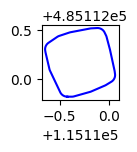

0.6691505007998549
Cluster is not a rectangle


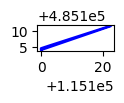

0.6496330378957731
Cluster is not a rectangle


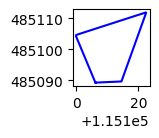

0.930490888814182
0.7498131868885475
6.187957874644406
0.7498131868820492
6.187954253457613
Cluster is a rectangle


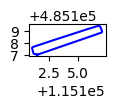

0.7115206236055758
Cluster is not a rectangle


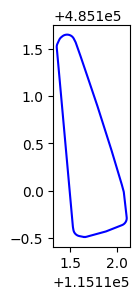

0.9305884072444481
0.6593776847797579
0.6636278697788152
0.6593812840769372
0.6636206710958258
Cluster is not a rectangle


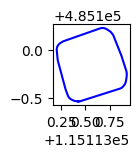

0.9539211236326745
0.6684386991787956
6.050693576361732
0.6684351561702514
6.05069711945293
Cluster is a rectangle


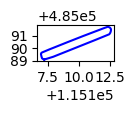

0.9802365790939023
0.6629504557632289
6.075401846614006
0.6629504557685445
6.07540184660046
Cluster is a rectangle


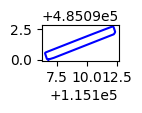

0.9355942774014134
0.6382461563780414
0.6638117309738513
0.6382498223882542
0.6638117309526023
Cluster is not a rectangle


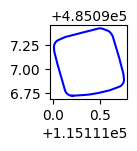

0.9713723658676194
0.6634895801741095
5.028207857467243
0.663489580218563
5.0282042218884495
Cluster is a rectangle


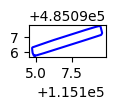

0.7537093530095127
Cluster is not a rectangle


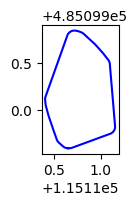

0.9857507781765277
0.6730956834783479
6.0862571789291575
0.6730993172985181
6.086257178910241
Cluster is a rectangle


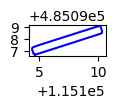

0.9833270944480376
0.6775079153328071
6.074221969860528
0.6775042787743407
6.074221969862758
Cluster is a rectangle


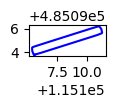

0.8012281842051432
Cluster is not a rectangle


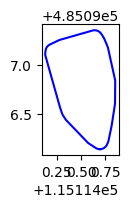

0.977809929774829
0.6504225742227242
6.035824566900804
0.6504298421194957
6.035828200862969
Cluster is a rectangle


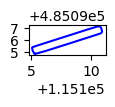

0.977809929774829
0.6504225742227242
6.035824566900804
0.6504298421194957
6.035828200862969
Cluster is a rectangle


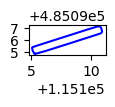

0.9081062969884379
0.6373365024963713
0.6655226388193348
0.6373401122656623
0.6655190289220886
Cluster is not a rectangle


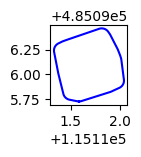

0.9713723658676194
0.6634895801741095
5.028207857467243
0.663489580218563
5.0282042218884495
Cluster is a rectangle


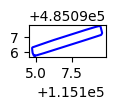

0.922343460510061
0.6579865088006819
0.6640934969136728
0.657986508693353
0.6641007549703992
Cluster is not a rectangle


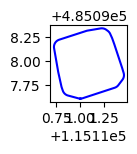

0.8867320253834333
Cluster is not a rectangle


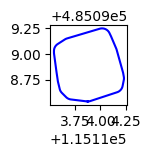

0.8917475890555457
Cluster is not a rectangle


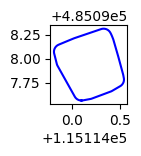

0.981871217303953
0.6876570725772063
6.111299233323148
0.6876607664341666
6.111295539397897
Cluster is a rectangle


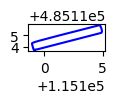

0.9739727178524047
0.6796927612359338
6.1420047630242065
0.6796890671169498
6.142001068885489
Cluster is a rectangle


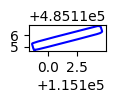

0.7882500958387909
Cluster is not a rectangle


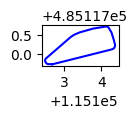

0.9883011590960339
0.6650750707012159
6.141313030830856
0.6650750706878382
6.141309398575564
Cluster is a rectangle


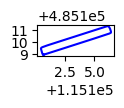

0.9848619281024255
0.6648252286066004
6.169561009865195
0.6648288577840472
6.169557380640829
Cluster is a rectangle


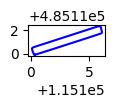

0.930490888814182
0.7498131868885475
6.187957874644406
0.7498131868820492
6.187954253457613
Cluster is a rectangle


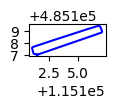

0.9445775447417211
0.6473245443959529
0.6605118844923448
0.6473245443631649
0.6605155265641047
Cluster is not a rectangle


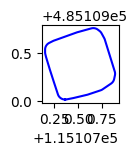

0.7435267927470663
Cluster is not a rectangle


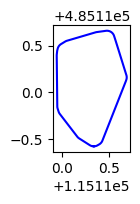

0.9209838652390897
0.6372280020738172
0.6623358559904257
0.6372243359923394
0.6623358560067677
Cluster is not a rectangle


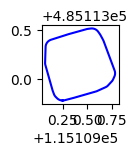

0.6849911788547008
Cluster is not a rectangle


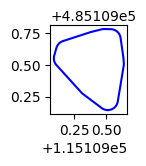

0.6557449717646507
Cluster is not a rectangle


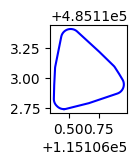

0.979884028699414
0.7041575910943854
6.184070315483673
0.7041612171474296
6.184070315524137
Cluster is a rectangle


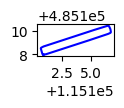

0.9434658774668128
0.6467294760863648
0.6776033310244471
0.6467331282413024
0.6775996788997775
Cluster is not a rectangle


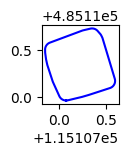

0.9329068921383455
0.603912461990884
0.6536186027446075
0.603912461990884
0.6536186027446075
Cluster is not a rectangle


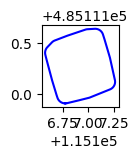

0.6527610059521571
Cluster is not a rectangle


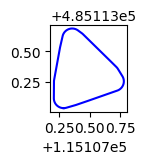

0.9463185874430404
0.621950212584822
0.6491443624327166
0.6219465936498406
0.6491443624511736
Cluster is not a rectangle


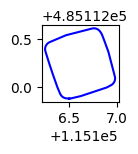

0.9045288197438667
0.6480915690737933
0.6601593726456919
0.648087871525491
0.6601556751341101
Cluster is not a rectangle


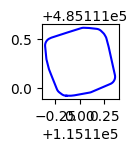

0.9062276365069232
0.6369334804451057
0.6470013322271033
0.6369334804451057
0.6470013322271033
Cluster is not a rectangle


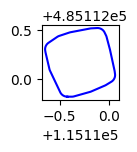

In [175]:
# Check if the polygons are rectangles 

# Initialize list of rectangular clusters
rect_clusters = []

for i in range(1, len(clusters)):

    # Initialize list to keep track of rectangular cluster dictionaries in a crosswalk
    cluster_list = []

    if len(clusters) != 0:
        for cluster in clusters[i]:
            
            area, rect_bool = is_rectangle(cluster['Polygon'])
            
            if rect_bool is True:

                # Plot the rectangular cluster
                print("Cluster is a rectangle")
                plot_polygon(cluster['Polygon'])

                # Append cluster to list of rectangular clusters of the crosswalk
                cluster_list.append(cluster)

            else:
                # Plot the non rectangular cluster
                print("Cluster is not a rectangle")
                plot_polygon(cluster['Polygon'])
            
            
            #print("-----------------------------------------------------------------")
        
        # Append rectangular cluster list to list with all rectangular clusters
        rect_clusters.append(cluster_list)

In [176]:
# Function to merge rectangular clusters of one crosswalk polygon
def merge_clusters(clusters):

    polygons = []
    clean_coords = []
    clean_intensity = []
    coords = []
    intensity = []

    for cluster in clusters:
        polygons.append(cluster['Polygon'])
        coords.append(cluster['coordinates'])
        intensity.append(cluster['intensity'])
        clean_coords.append(cluster['clean_coords'])
        clean_intensity.append(cluster['clean_intensity'])
    
    PC_coords = np.concatenate(coords, axis=0)
    PC_intensity = np.concatenate(intensity, axis=0)
    PC_coords_clean = np.concatenate(clean_coords, axis=0)
    PC_intensity_clean = np.concatenate(clean_intensity, axis=0)
    
    multi_pol = MultiPolygon(polygons)
    
    pol = multi_pol.convex_hull

    pol_dict = {'CW_index': clusters[0]['CW_index'], 'coordinates': PC_coords, 'intensity': PC_intensity, 'clean_coords': PC_coords_clean, 'clean_intensity': PC_intensity_clean}

    return pol_dict

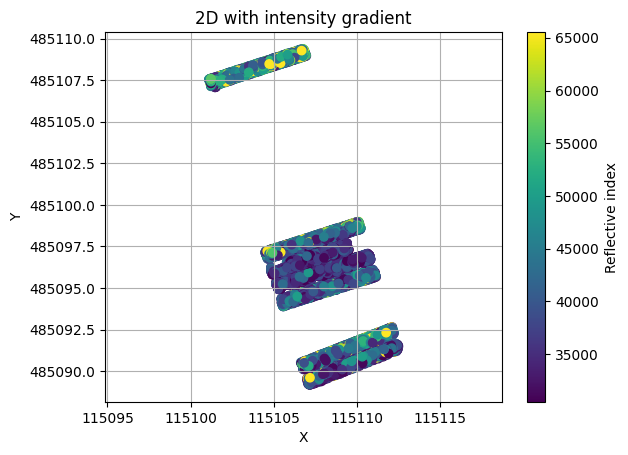

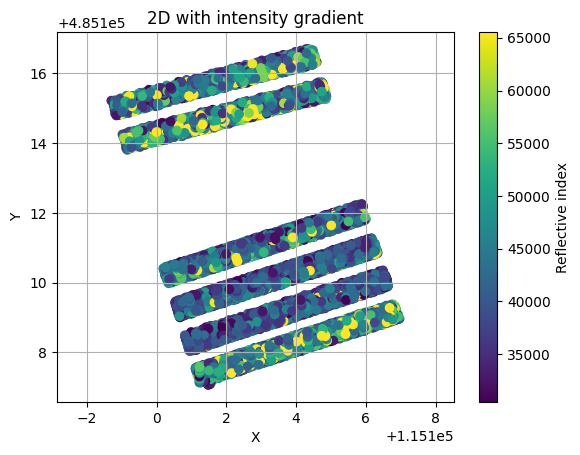

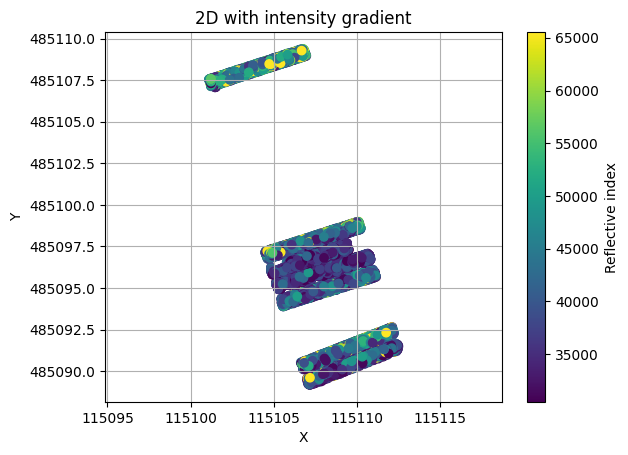

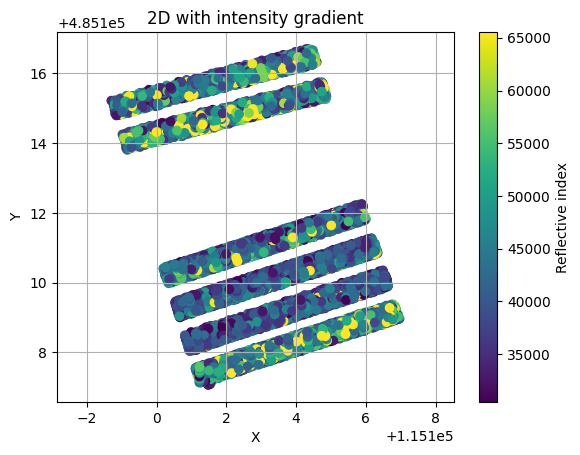

In [177]:
# Merge rectangular clusters belonging to the same polygon

# Initialize list of final polygons
pols = []

for clusters in rect_clusters:
    
    if len(clusters) > 0:

        # Merge clusters
        pol = merge_clusters(clusters)

        # Plot final PC polygon
        plot_PC_2D(pol, 'clean_coords', 'clean_intensity')

        # Append merged clusters to final polygon list
        pols.append(pol)